# Training the Perceptron with the Perceptron Learning Rule

## Step 1: Initialize Variables and Environment

In [ ]:
import torch

# Set random seed for reproducibility
torch.manual_seed(42)

# Synthetic linear dataset with more data points
X = torch.tensor([
    [0.5, 1.5], [1.0, 2.0], [1.5, 2.5],  # Original points
    [0.2, 1.0], [0.7, 1.8], [1.2, 2.2],  # More points for the first class (or border)
    [2.0, 3.0], [2.5, 3.5], [3.0, 4.0],  # Points clearly for the second class
    [0.8, 1.3], [1.3, 1.7], [2.2, 3.2]   # Additional mixed/borderline points
], dtype=torch.float32)

y = torch.tensor([
    0, 1, 1,
    0, 0, 1,
    1, 1, 1,
    0, 0, 1
], dtype=torch.float32)

print("Input data (X):")
print(X)
print("\nTarget labels (y):")
print(y)

Input data (X):
tensor([[0.5000, 1.5000],
        [1.0000, 2.0000],
        [1.5000, 2.5000],
        [0.2000, 1.0000],
        [0.7000, 1.8000],
        [1.2000, 2.2000],
        [2.0000, 3.0000],
        [2.5000, 3.5000],
        [3.0000, 4.0000],
        [0.8000, 1.3000],
        [1.3000, 1.7000],
        [2.2000, 3.2000]])

Target labels (y):
tensor([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.])


## Step 2: Implementing the Perceptron Class with the Perceptron Learning Rule


In [ ]:
class Perceptron:
    def __init__(self, input_dim, learning_rate=0.01):
        # Initialize weights to zeros. input_dim is the number of features.
        self.weights = torch.zeros(input_dim, dtype=torch.float32, requires_grad=False)
        # Note: A bias term is often included, but omitted here for simplicity.
        # Example with bias: self.weights = torch.zeros(input_dim + 1, ...)

        self.learning_rate = learning_rate

        # History tracking for visualization
        self.weights_history = []
        self.epoch_loss_history = []


    def forward(self, x):
        # Computes the weighted sum of inputs (linear combination)
        # x is a single input sample
        return torch.dot(self.weights, x)
        # If using bias:
        # x_biased = torch.cat((x, torch.tensor([1.0]))) # Append 1 for bias
        # return torch.dot(self.weights, x_biased)

    def predict(self, x):
        # Applies the sigmoid activation function to the output of the forward pass.
        # For a classical Perceptron, a step function (e.g., Heaviside) would be used here.
        # Sigmoid output is between 0 and 1, interpreted as a probability.
        return torch.sigmoid(self.forward(x))

    def update_weights(self, x, error):
        # Perceptron Learning Rule: w_new = w_old + learning_rate * error * x
        # error = target - prediction (where prediction is sigmoid output)
        self.weights += self.learning_rate * error * x
        # If using bias:
        # x_biased = torch.cat((x, torch.tensor([1.0])))
        # self.weights += self.learning_rate * error * x_biased

    # --------------------------------------------------------------------------
    # Step 3: Training with the Perceptron Learning Rule
    # --------------------------------------------------------------------------
    def train(self, X_train, y_train, epochs=10):
        """
        Trains the perceptron model.
        X_train: Training input data (tensor of samples)
        y_train: Training target labels (tensor of labels)
        epochs: Number of passes through the entire dataset
        """
        print(f"Initial weights: {self.weights.numpy()}")
        self.weights_history.append(self.weights.clone()) # Store initial weights
        self.epoch_loss_history.append(0) # Placeholder for loss before training

        for epoch in range(epochs):
            epoch_total_loss = 0.0
            num_samples = X_train.size(0)

            for i in range(num_samples):
                x_sample = X_train[i]
                y_target = y_train[i]

                # Make a prediction
                prediction = self.predict(x_sample)

                # Calculate the error
                # For this setup (sigmoid + (target-prediction) error term), this resembles
                # a gradient ascent step for logistic regression.
                # A classical perceptron error would be target - step_function_output.
                error = y_target - prediction

                # Update weights
                self.update_weights(x_sample, error)

                # Accumulate loss (e.g., squared error for observation)
                # Using (error)^2 as a simple loss measure for this sample.
                # Note: This 'error' is (target - sigmoid_output), not binary error.
                epoch_total_loss += error.item() ** 2

            # Store weights and average loss for this epoch
            self.weights_history.append(self.weights.clone())
            average_epoch_loss = epoch_total_loss / num_samples
            self.epoch_loss_history.append(average_epoch_loss)

            if (epoch + 1) % 1 == 0: # Print every epoch
                print(f'Epoch {epoch + 1}/{epochs}: Weights = {self.weights.numpy()}, Avg Sample Loss = {average_epoch_loss:.4f}')

## Step 3: Training the Perceptron and Visualizing Training Progress


Initial weights: [0. 0.]
Epoch 1/30: Weights = [0.20759994 0.2472634 ], Avg Sample Loss = 0.2344
Epoch 2/30: Weights = [0.27219766 0.24924435], Avg Sample Loss = 0.2203
Epoch 3/30: Weights = [0.32017413 0.22413212], Avg Sample Loss = 0.2192
Epoch 4/30: Weights = [0.36509264 0.19532365], Avg Sample Loss = 0.2180
Epoch 5/30: Weights = [0.4089883  0.16631305], Avg Sample Loss = 0.2169
Epoch 6/30: Weights = [0.45219004 0.13764685], Avg Sample Loss = 0.2157
Epoch 7/30: Weights = [0.49475822 0.10940696], Avg Sample Loss = 0.2146
Epoch 8/30: Weights = [0.5367097  0.08160086], Avg Sample Loss = 0.2135
Epoch 9/30: Weights = [0.5780549  0.05422401], Avg Sample Loss = 0.2125
Epoch 10/30: Weights = [0.6188027  0.02726985], Avg Sample Loss = 0.2114
Epoch 11/30: Weights = [0.6589618  0.00073165], Avg Sample Loss = 0.2104
Epoch 12/30: Weights = [ 0.6985407  -0.02539738], Avg Sample Loss = 0.2095
Epoch 13/30: Weights = [ 0.73754823 -0.05112387], Avg Sample Loss = 0.2085
Epoch 14/30: Weights = [ 0.7759

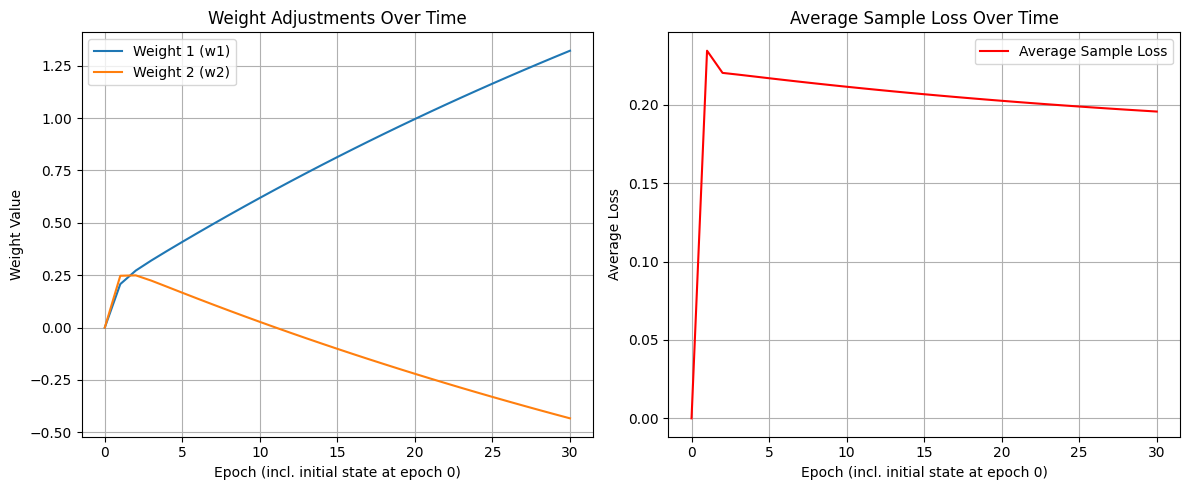


Final weights after training:
[ 1.3211825  -0.43301466]


In [ ]:
import matplotlib.pyplot as plt

# Create a Perceptron instance
perceptron = Perceptron(input_dim=X.size(1), learning_rate=0.1)

# Train the perceptron
num_epochs = 30
perceptron.train(X, y, epochs=num_epochs)

# Plotting weight adjustments
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# weights_history stores tensors; extract individual weight components for plotting
# Assuming 2 weights for 2 input features
num_epochs_plot = len(perceptron.weights_history) # Should be epochs + 1 (initial weights)
epochs_range = range(num_epochs_plot)

# Plot for weight 1
plt.plot(epochs_range, [wh[0].item() for wh in perceptron.weights_history], label='Weight 1 (w1)')
# Plot for weight 2
plt.plot(epochs_range, [wh[1].item() for wh in perceptron.weights_history], label='Weight 2 (w2)')

plt.title('Weight Adjustments Over Time')
plt.xlabel('Epoch (incl. initial state at epoch 0)')
plt.ylabel('Weight Value')
plt.legend()
plt.grid(True)

# Plotting loss history
plt.subplot(1, 2, 2)
# epoch_loss_history also includes a 0 for initial state, so length is epochs + 1
plt.plot(epochs_range, perceptron.epoch_loss_history, label='Average Sample Loss', color='red')
plt.title('Average Sample Loss Over Time')
plt.xlabel('Epoch (incl. initial state at epoch 0)')
plt.ylabel('Average Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nFinal weights after training:")
print(perceptron.weights.numpy())